In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
import os
import torch
import torchvision
import numpy as np
import matplotlib.pyplot as plt

from ssl_playground.data import MNIST64

In [3]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
device

device(type='cpu')

In [4]:
mnist64 = MNIST64("../data/mnist64")

In [5]:
batch_size = 8

In [6]:
mnist64.make_data_and_loaders(batch_size)

In [7]:
example_iter = iter(mnist64.train_data_loader)
example_data = next(example_iter)
example_imgs, example_labels = example_data

In [8]:
print(example_imgs.size())
print(example_labels)

torch.Size([8, 1, 64, 64])
tensor([2, 0, 1, 6, 3, 1, 7, 8])


In [9]:
example_tfmed_imgs = MNIST64.transform_images_uniform(example_imgs, 60, [-15, -10], 1)

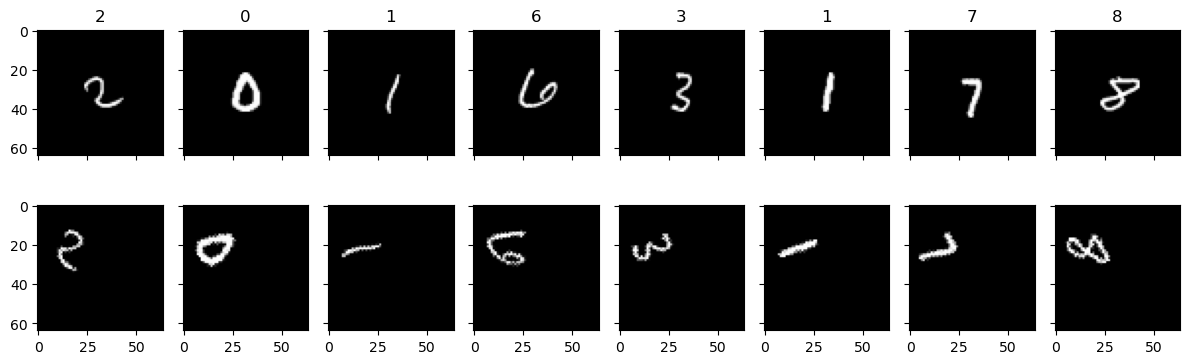

In [10]:
fig, ax = plt.subplots(2, batch_size, figsize=(12,4), sharex=True, sharey=True)
for i in range(batch_size):
    ax[0,i].imshow(example_imgs[i,0], cmap="gray")
    ax[1,i].imshow(example_tfmed_imgs[i,0], cmap="gray")
    ax[0,i].set_title(example_labels[i].item())
plt.tight_layout()

In [11]:
example_random_uniform_tfmed_imgs, random_uniform_params = MNIST64.random_transform_images_uniform(example_imgs)

In [12]:
random_uniform_params

(-58.74720001220703, (14, 12), 1.950339913368225)

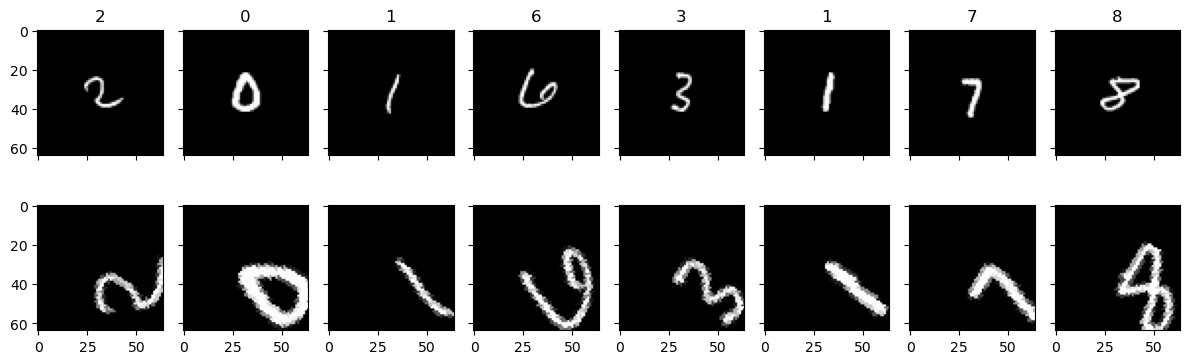

In [13]:
fig, ax = plt.subplots(2, batch_size, figsize=(12,4), sharex=True, sharey=True)
for i in range(batch_size):
    ax[0,i].imshow(example_imgs[i,0], cmap="gray")
    ax[1,i].imshow(example_random_uniform_tfmed_imgs[i,0], cmap="gray")
    ax[0,i].set_title(example_labels[i].item())
plt.tight_layout()

In [14]:
example_random_tfmed_imgs, random_params = MNIST64.random_transform_images(example_imgs)

In [15]:
random_params

(array([ 161.05188048, -109.71483827,  101.0270555 , -172.49118053,
         160.25226187,  146.35406082,  126.46004775,   43.29845275]),
 array([[-10.06061381, -18.01056563, -22.70949028,  11.02408309,
          -5.30094979,  19.24228594,  -5.02145556, -14.81215862],
        [ 13.3461722 , -25.08032957,  -5.79454888,   2.55020735,
           9.37892038,  12.51559246,  -5.59288348, -15.00452799]]),
 array([1.19269523, 1.76126968, 0.70599909, 1.34383651, 1.18177105,
        0.86072512, 1.16946275, 0.89614237]))

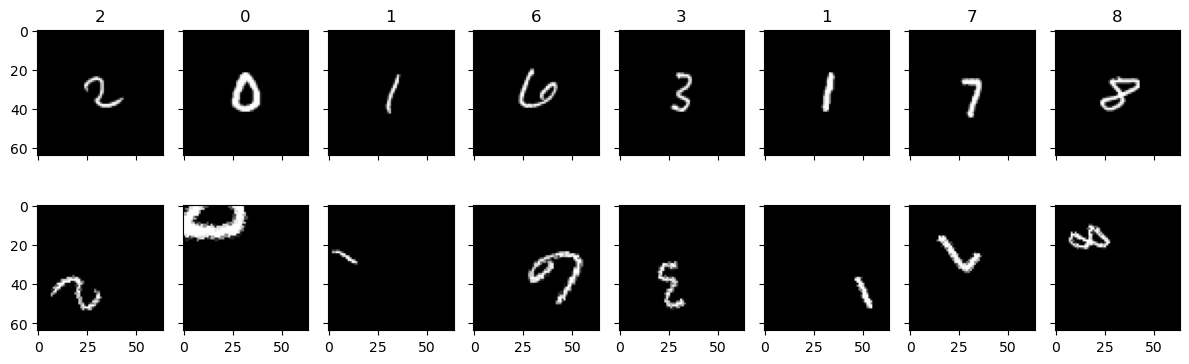

In [16]:
fig, ax = plt.subplots(2, batch_size, figsize=(12,4), sharex=True, sharey=True)
for i in range(batch_size):
    ax[0,i].imshow(example_imgs[i,0], cmap="gray")
    ax[1,i].imshow(example_random_tfmed_imgs[i,0], cmap="gray")
    ax[0,i].set_title(example_labels[i].item())
plt.tight_layout()

In [17]:
tfmed_1, tfmed_2, uniform_delta_params = MNIST64.random_transform_pairs_uniform(example_imgs)

In [18]:
uniform_delta_params

(-239.6407699584961, (36, 41), -1.3519203662872314)

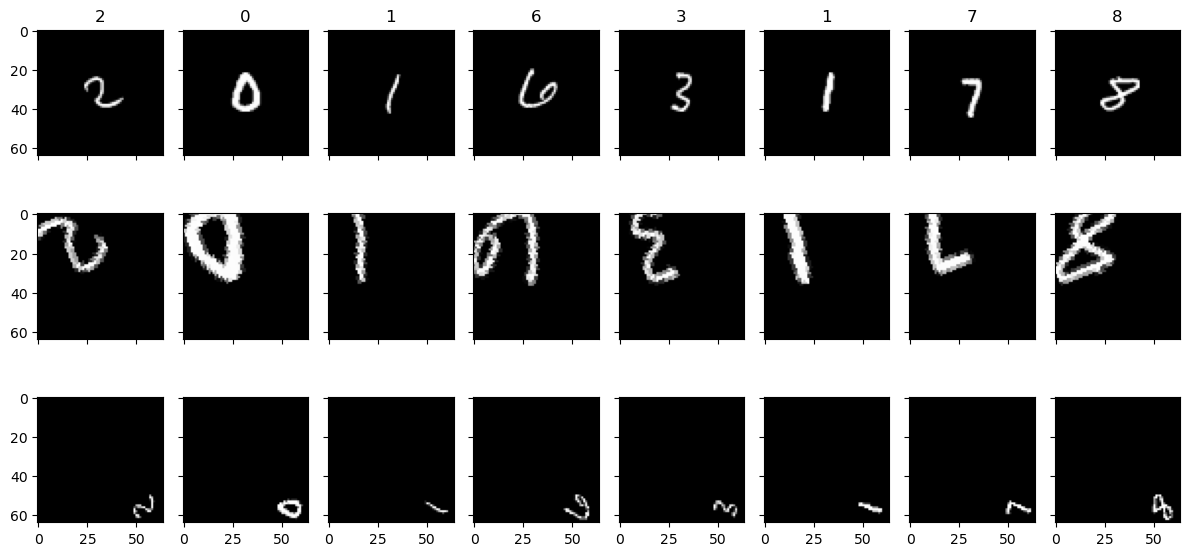

In [19]:
fig, ax = plt.subplots(3, batch_size, figsize=(12,6), sharex=True, sharey=True)
for i in range(batch_size):
    ax[0,i].imshow(example_imgs[i,0], cmap="gray")
    ax[1,i].imshow(tfmed_1[i,0], cmap="gray")
    ax[2,i].imshow(tfmed_2[i,0], cmap="gray")
    ax[0,i].set_title(example_labels[i].item())
plt.tight_layout()

In [20]:
tfmed_3, tfmed_4, delta_params = MNIST64.random_transform_pairs(example_imgs)

In [21]:
delta_params

(array([ -51.15849852,  -31.05110272,  200.12881427, -120.49761471,
        -115.78530959,  -21.81461861,  -33.56757648,   68.3867676 ]),
 array([[  3.4078152 , -10.50133582, -27.00385732,  -1.40750087,
          -2.4622996 ,  28.7533799 ,  -6.41979475,  24.47629807],
        [-26.76347598,  -4.44574812,   0.24932698,   0.15928362,
           0.65899916,  34.50316394,  19.36475875,  15.46350858]]),
 array([ 0.19170078, -0.27427134,  0.65727748,  1.08562139, -0.08564979,
        -0.44072659, -0.70936612, -0.85389938]))

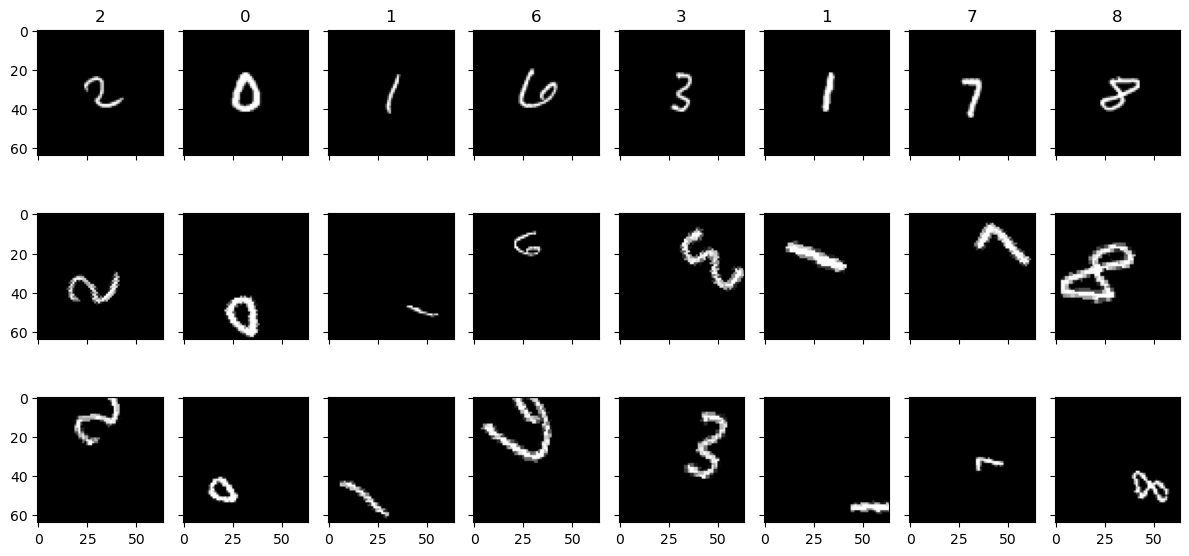

In [22]:
fig, ax = plt.subplots(3, batch_size, figsize=(12,6), sharex=True, sharey=True)
for i in range(batch_size):
    ax[0,i].imshow(example_imgs[i,0], cmap="gray")
    ax[1,i].imshow(tfmed_3[i,0], cmap="gray")
    ax[2,i].imshow(tfmed_4[i,0], cmap="gray")
    ax[0,i].set_title(example_labels[i].item())
plt.tight_layout()